In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

In [353]:
df_1 = pd.read_csv('Telco.csv')
pd.set_option('display.max_columns',None)

In [354]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [355]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [356]:
df_1.drop('customerID', axis = 1, inplace = True)

In [357]:
df_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [358]:
#df_1['TotalCharges'] = df_1['TotalCharges'].astype(int)
df_1['TotalCharges'] = pd.to_numeric(df_1['TotalCharges'], errors='coerce')

In [359]:
df_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [360]:
df_1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [361]:
df_1['TotalCharges'].isna().sum()

11

In [362]:
df_1 = df_1.dropna()

In [363]:
df_1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [364]:
df_1.shape

(7032, 20)

In [365]:
df_1.iloc[555]['Churn'],['StreamingTV']

('No', ['StreamingTV'])

Text(0, 0.5, 'Number of Customer')

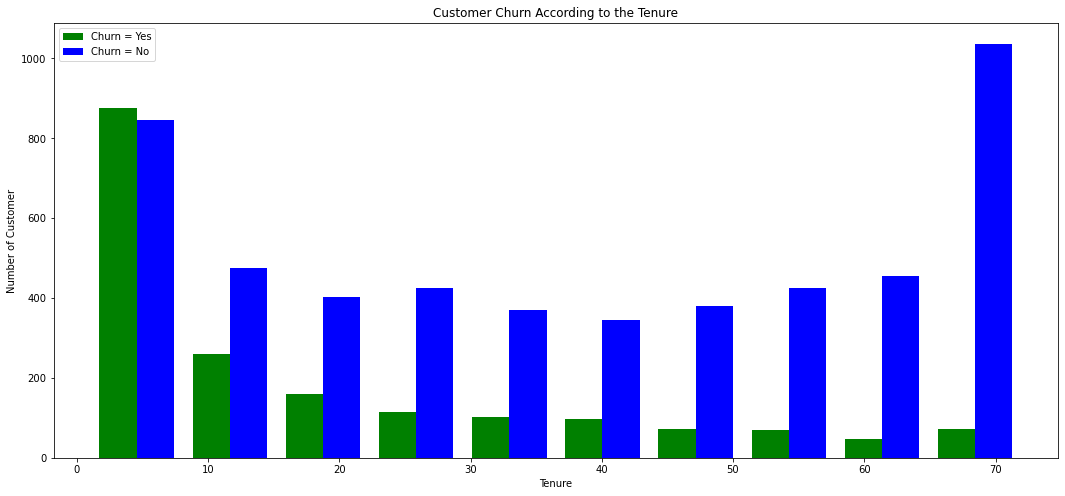

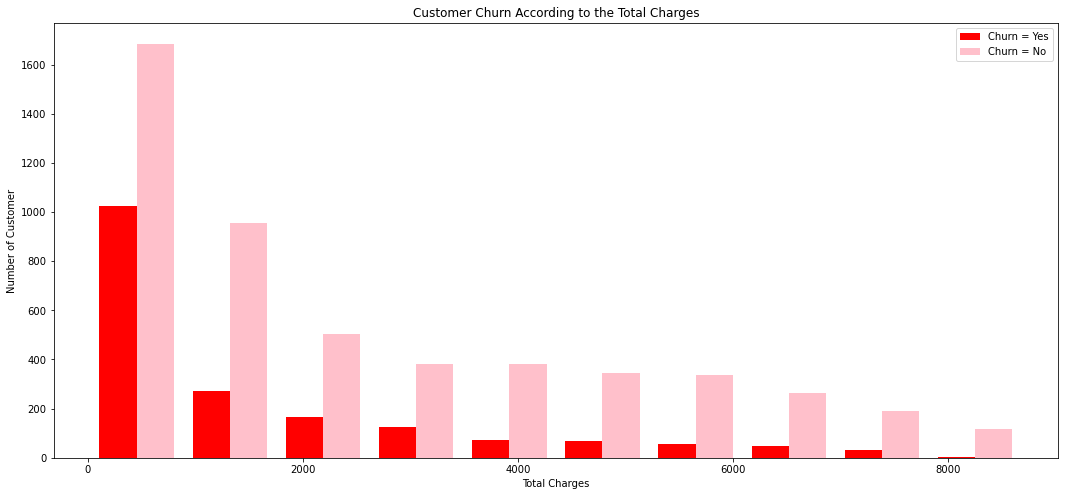

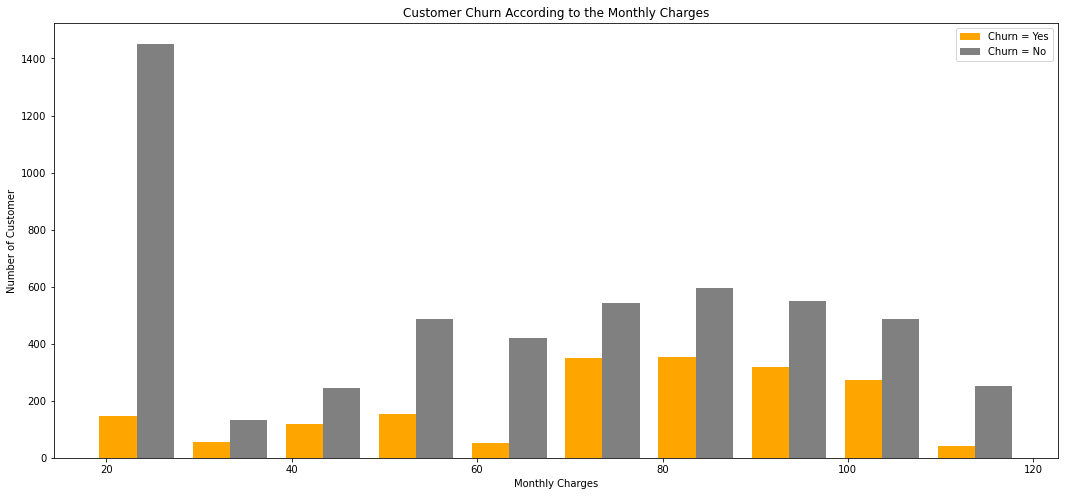

In [366]:
Churn_yes_tenure = df_1[df_1.Churn == 'Yes'].tenure
Churn_no_tenure = df_1[df_1.Churn == 'No'].tenure

Curn_yes_TotalCharges = df_1[df_1.Churn == 'Yes'].TotalCharges
Curn_no_TotalCharges = df_1[df_1.Churn == 'No'].TotalCharges

Curn_yes_MonthlyCharges = df_1[df_1.Churn == 'Yes'].MonthlyCharges
Curn_no_MonthlyCharges = df_1[df_1.Churn == 'No'].MonthlyCharges

plt.figure(figsize=(18, 8))
plt.hist([Churn_yes_gender, Churn_no_gender], color=['green', 'blue'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.title('Customer Churn According to the Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customer')

plt.figure(figsize=(18, 8))
plt.hist([Curn_yes_TotalCharges, Curn_no_TotalCharges], color=['red', 'pink'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.title('Customer Churn According to the Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customer')

plt.figure(figsize=(18, 8))
plt.hist([Curn_yes_MonthlyCharges, Curn_no_MonthlyCharges], color=['orange', 'gray'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.title('Customer Churn According to the Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customer')

In [367]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [368]:
for columns in df_1:
    if df_1[columns].dtypes == 'object':
        print(f'{columns}:{df_1[columns].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [369]:
df_1.replace('No phone service', 'No', inplace = True)
df_1.replace('No internet service', 'No', inplace = True)

In [370]:
for columns in df_1:
    if df_1[columns].dtypes == 'object':
        print(f'{columns}:{df_1[columns].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [371]:
yes_no_list = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'MultipleLines',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'PaperlessBilling', 'Churn']

df_1['gender'].replace({'Male' : 1, 'Female' : '0'}, inplace = True)

for clm in yes_no_list:
    df_1[clm].replace({'Yes' : 1, 'No': 0 }, inplace = True)

In [372]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [373]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [374]:
df_1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [375]:
df_2 = pd.get_dummies(data = df_1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

In [376]:
df_2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6027,1,0,1,1,35,1,1,0,0,0,0,0,0,0,25.45,809.25,0,0,0,1,0,0,1,1,0,0,0
1292,0,0,0,0,62,1,1,0,1,1,1,1,1,0,84.50,5193.20,0,1,0,0,0,0,1,1,0,0,0
5153,1,1,1,0,41,1,0,0,1,0,0,1,1,1,94.55,3851.45,0,0,1,0,1,0,0,0,0,1,0
1612,1,0,1,1,67,1,1,0,1,1,0,0,0,0,87.40,5918.80,1,0,1,0,0,1,0,0,0,1,0
2998,1,0,0,0,2,1,0,0,1,0,0,0,0,1,74.75,144.80,0,0,1,0,1,0,0,0,0,1,0
4256,0,0,1,0,70,1,1,0,0,0,0,0,0,1,26.00,2006.95,0,0,0,1,0,0,1,1,0,0,0
5873,0,0,0,0,18,1,0,1,0,0,0,0,0,1,75.40,1380.40,0,0,1,0,1,0,0,0,0,1,0
5927,1,0,0,0,51,1,1,0,0,0,0,0,0,0,24.75,1234.60,0,0,0,1,0,0,1,0,0,0,1
2196,0,0,1,1,19,1,0,0,0,0,0,0,0,0,20.20,382.20,0,0,0,1,1,0,0,0,0,0,1
6386,1,0,1,1,72,1,1,1,0,1,1,1,1,1,83.55,6093.30,0,1,0,0,0,0,1,0,1,0,0


In [377]:
df_2['gender'] = pd.to_numeric(df_2['gender'], errors='coerce')

In [378]:
df_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [379]:
Scale = MinMaxScaler()

In [380]:
col_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_2[col_scale] = Scale.fit_transform(df_2[col_scale])

In [381]:
df_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [382]:
X = df_2.drop('Churn', axis = 1)

In [383]:
Y = df_2.Churn

In [384]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,1,0,1,0,0,0,0,1,0


In [385]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [386]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [387]:
X_train.shape

(5625, 26)

In [388]:
model = keras.Sequential([
    keras.layers.Dense(25, input_shape = (26,), activation = 'relu'),
    #keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 909us/step - loss: 0.5286 - accuracy: 0.7266
Epoch 2/100
176/176 [==============================] - 0s 961us/step - loss: 0.4348 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 0s 892us/step - loss: 0.4256 - accuracy: 0.7954
Epoch 4/100
176/176 [==============================] - 0s 971us/step - loss: 0.4224 - accuracy: 0.7973
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8009
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8030
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 

176/176 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8176
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8165
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8155
Epoch 84/100
176/176 [==============================] - 0s 965us/step - loss: 0.3889 - accuracy: 0.8164
Epoch 85/100
176/176 [==============================] - 0s 980us/step - loss: 0.3887 - accuracy: 0.8185
Epoch 86/100
176/176 [==============================] - 0s 887us/step - loss: 0.3886 - accuracy: 0.8139
Epoch 87/100
176/176 [==============================] - 0s 883us/step - loss: 0.3893 - accuracy: 0.8148
Epoch 88/100
176/176 [==============================] - 0s 852us/step - loss: 0.3887 - accuracy: 0.8148
Epoch 89/100
176/176 [==============================] - 0s 855us/step - loss: 0.3880 - accuracy: 0.8178
Epoch 90/100
176/176 [==============================] - 0s 852us/step - loss: 0.388

In [389]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 906us/step - loss: 0.4120 - accuracy: 0.8060


[0.41200917959213257, 0.8059701323509216]

In [390]:
model = keras.Sequential([
    keras.layers.Dense(25, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5387 - accuracy: 0.7360
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7895
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8059
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8075
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8316
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8331
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8336
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8359
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8348
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8347
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8324
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8341
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8334
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 

In [391]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.7910


[0.44855642318725586, 0.7910447716712952]

In [395]:
YP = model.predict(X_test)

In [396]:
Y_predict = []

for el in YP:
    if el > 0.5:
        Y_predict.append(1)
    else:
        Y_predict.append(0)

In [402]:
Y_test[:10]

1431    0
3170    0
5197    0
1338    1
2265    1
4198    0
720     0
5080    0
1064    0
2050    0
Name: Churn, dtype: int64

In [401]:
Y_predict[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [404]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.62      0.55      0.58       373

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(33.0, 0.5, 'Truth')

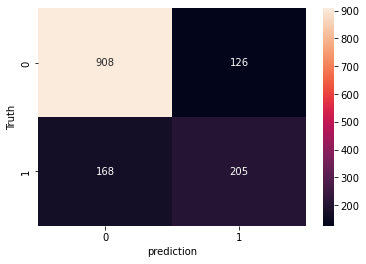

In [410]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predict)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('prediction')
plt.ylabel('Truth')